In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

df= pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")



In [2]:
#EDA
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


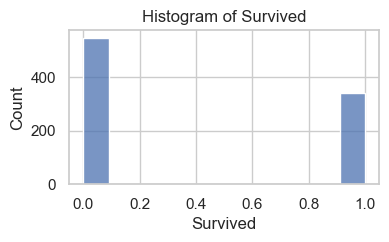

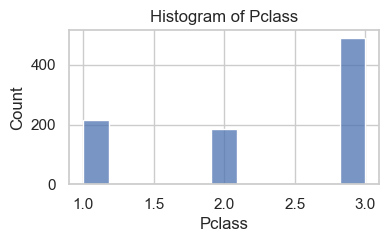

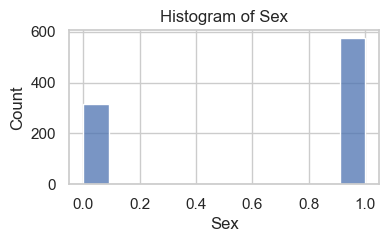

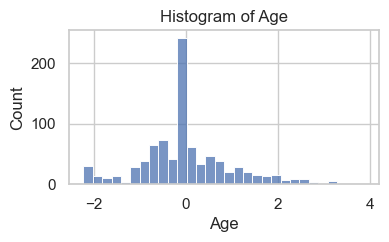

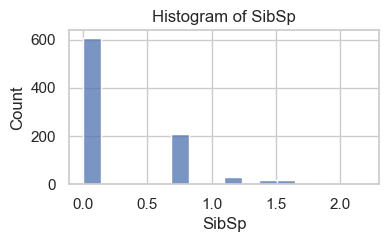

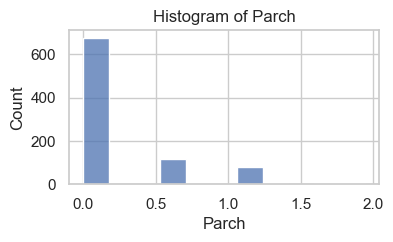

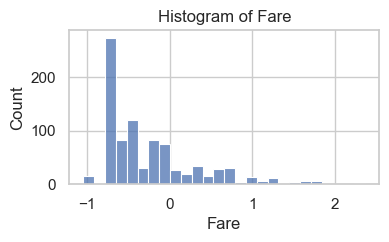

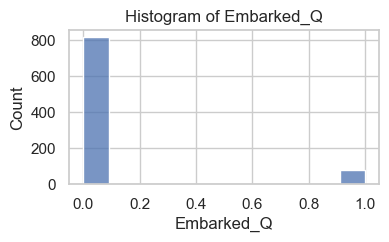

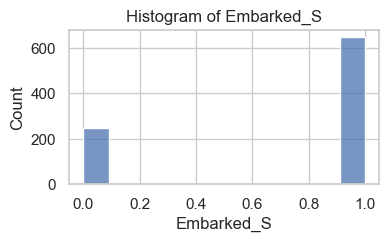

In [63]:
#Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of each column using histograms
for col in df.columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col])
    plt.title(f"Histogram of {col}")
    plt.show()

In [3]:
#data preprocessing 

#Data Preprocessing

df.isnull().sum()
df["Age"].fillna(df["Age"].median(),inplace = True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace = True)
#most of cabin variable contains missing values so droping the variable
df.drop(columns=['Cabin','Name','Ticket','PassengerId'],inplace = True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
#data transformation

#applying log transformation on highly skewed data variables

#for right-skewed data
columns_to_log = ['Fare','Parch','SibSp']  # Replace with your actual columns
for col in columns_to_log:
    if col == 'Fare':
        df[col] = np.log1p(df[col])
    else:
        df[col] = np.log(df[col] + 1)

In [13]:
# dATA TRANSFORMTION

#label-encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder() 

#1- Female, 2 - Petrol
df["Sex"] = LE.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
#standardizing the data

cols_to_scale = ['Fare', 'Age']

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
for col in cols_to_scale:
    df[col] = SS.fit_transform(df[[col]])



In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,-0.565736,0.693147,0.0,-0.879741,False,True
1,1,1,0,0.663861,0.693147,0.0,1.361220,False,False
2,1,3,0,-0.258337,0.000000,0.0,-0.798540,False,True
3,1,1,0,0.433312,0.693147,0.0,1.062038,False,True
4,0,3,1,0.433312,0.000000,0.0,-0.784179,False,True


In [16]:
#Data partition

from sklearn.model_selection import train_test_split

# Split data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

In [17]:
#model fitting
from sklearn.linear_model import LogisticRegression

# Train logistic regression
model = LogisticRegression(max_iter=210)
model.fit(X_train, y_train)


LogisticRegression(max_iter=210)

In [18]:
#model prediction
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]




In [19]:
#Model Evaluation

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)
print(f"Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}, AUC={roc_auc:.2f}")

Accuracy=0.80, Precision=0.75, Recall=0.71, F1=0.73, AUC=0.83


In [ ]:
#Visualization of ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_val, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [21]:
#Interpretation of Co-effcients
coef = pd.Series(model.coef_[0], index=X_train.columns).sort_values()
print(coef)

Sex          -2.511389
Pclass       -0.925626
SibSp        -0.520339
Age          -0.491525
Embarked_S   -0.334262
Parch        -0.245379
Embarked_Q    0.321982
Fare          0.346488
dtype: float64


In [46]:
%%writefile streamlit_app.py
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

df= pd.read_csv("Titanic_train.csv")


#EDA
df.describe()

#Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# # Visualize distribution of each column using histograms
# for col in df.columns:
#     plt.figure(figsize=(4, 2))
#     sns.histplot(df[col])
#     plt.title(f"Histogram of {col}")
#     plt.show()

 

#Data Preprocessing

df.isnull().sum()
df["Age"].fillna(df["Age"].median(),inplace = True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace = True)
#most of cabin variable contains missing values so droping the variable
df.drop(columns=['Cabin','Name','Ticket','PassengerId'],inplace = True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)



#data transformation

#applying log transformation on highly skewed data variables

#for right-skewed data
columns_to_log = ['Fare','Parch','SibSp']  # Replace with your actual columns
for col in columns_to_log:
    if col == 'Fare':
        df[col] = np.log1p(df[col])
    else:
        df[col] = np.log(df[col] + 1)



# dATA TRANSFORMTION

#label-encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder() 

#1- Female, 2 - Petrol
df["Sex"] = LE.fit_transform(df["Sex"])

#standardizing the data

cols_to_scale = ['Fare', 'Age']

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
for col in cols_to_scale:
    df[col] = SS.fit_transform(df[[col]])

#Data partition

from sklearn.model_selection import train_test_split

# Split data
X = df.drop('Survived', axis=1)
Y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


#model fitting
from sklearn.linear_model import LogisticRegression

# Train logistic regression
model = LogisticRegression(max_iter=210)
model.fit(X_train, y_train)

#model prediction
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

# #Interpretation of Co-effcients
# coef = pd.Series(model.coef_[0], index=X_train.columns).sort_values()
# print(coef)

#Data Preprocessing for test data

def preprocess(df_test):
    df_test["Age"].fillna(df_test["Age"].median(), inplace=True)
    df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)
    if 'Cabin' in df_test.columns:
        df_test.drop(columns=['Cabin'], inplace=True)
    if 'Name' in df_test.columns:
        df_test.drop(columns=['Name'], inplace=True)
    if 'Ticket' in df_test.columns:
        df_test.drop(columns=['Ticket'], inplace=True)
    if 'PassengerId' in df_test.columns:
        df_test.drop(columns=['PassengerId'], inplace=True)
    
    # Encode 'Embarked' only if it exists
    if 'Embarked' in df_test.columns:
        df_test["Embarked"].fillna(df_test["Embarked"].mode()[0], inplace=True)
        df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)
    
    return df_test

def transform(df):
    #1- Female, 2 - Petrol
    df["Sex"] = LE.fit_transform(df["Sex"])
    
    #standardizing the data
    cols_to_scale = ['Fare', 'Age']
    for col in cols_to_scale:
        df[col] = SS.fit_transform(df[[col]])
    return df




import streamlit as st
st.subheader("Upload CSV File for Prediction")
uploaded_file = st.file_uploader("Titanic_test.py",type=["csv"])

if uploaded_file:
    try:
        
        user_df = pd.read_csv(uploaded_file,on_bad_lines='skip')
        st.write("File uploaded successfully!")
        # Check if user_df is None or not
        if user_df is None:
            st.error("The uploaded DataFrame is None.")
            st.stop()

        st.write("First few rows of uploaded data:", user_df.head())
        original = user_df.copy()
        
        # Check for target column
        has_target = 'Survived' in user_df.columns
    
        # Preprocess user data
        user_df = preprocess(user_df)
        user_df = transform(user_df)
        
    
        # Align columns after preprocessing
        missing_cols = set(X.columns) - set(user_df.columns)
        for col in missing_cols:
            user_df[col] = 0  # add missing columns with default value
        user_df = user_df[X.columns]  # reorder to match training
    
        if has_target:
            X_user = user_df.drop("Survived", axis=1)
            y_user = original['Survived']
            y_pred = model.predict(X_user)
            y_prob = model.predict_proba(X_user)[:, 1]
    
            # Evaluation metrics
            st.write("**Uploaded Data Evaluation:**")
            st.write("Accuracy:", accuracy_score(y_user, y_pred))
            st.write("Precision:", precision_score(y_user, y_pred))
            st.write("Recall:", recall_score(y_user, y_pred))
            st.write("F1 Score:", f1_score(y_user, y_pred))
            st.write("ROC AUC Score:", roc_auc_score(y_user, y_prob))
    
            # ROC Curve
            fpr, tpr, _ = roc_curve(y_user, y_prob)
            fig, ax = plt.subplots()
            ax.plot(fpr, tpr, label='ROC Curve')
            ax.plot([0, 1], [0, 1], 'k--')
            ax.set_xlabel("False Positive Rate")
            ax.set_ylabel("True Positive Rate")
            ax.set_title("ROC Curve (Uploaded File)")
            ax.legend()
            st.pyplot(fig)
        else:
            # Predict for unlabeled data
            y_pred = model.predict(user_df)
            y_prob = model.predict_proba(user_df)[:, 1]
            result_df = original.copy()
            result_df['Prediction'] = y_pred
            result_df['Survival Probability'] = y_prob
            st.write("### Prediction Results")
            st.dataframe(result_df)
            csv = result_df.to_csv(index=False).encode('utf-8')
            st.download_button("Download Results", data=csv, file_name="predictions.csv", mime='text/csv')
    except Exception as e:
        st.error(f"Error reading file: {e}")
        st.stop()
else:
    st.warning("Please upload a CSV file to proceed.")


Overwriting streamlit_app.py
